In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, ttest_ind, mannwhitneyu
import statsmodels.api as sma
import statsmodels.stats as smst

In [341]:
# Test equality of variances

def var_chk(ser1, ser2):
    stats, bf = levene(ser1, ser2, center='median')
    return round(bf, 3)

In [342]:
# Test normality

def norm_chk(ser):
    norm = smst.diagnostic.lilliefors(ser, pvalmethod='approx')[1]
    return round(norm, 3)

In [343]:
# Test two series for variance equality and normality; choose and apply compartible test

def t_test(ser1, ser2, parameter):
    
    # Test the conditions
    norm1, norm2 = norm_chk(ser1), norm_chk(ser2)  # p-values of Lilliefors tests
    bf = var_chk(ser1, ser2)  # p-value of Brown-Forsithe test
    normality = norm1 >= 0.05 and norm2 >= 0.05  # both samples are normal
    var_eq = bf >= 0.05  # variances of samples are equal
    
    if var_eq and normality:
        t = ttest_ind(ser1, ser2)  # Student's t-test
        test = '2-сторонний t-тест Стьюдента'
        
    elif not var_eq and normality:
        t = ttest_ind(ser1, ser2, equal_var = False)  # Welch t-test
        test = '2-сторонний t-тест Уэлча'
    
    elif not normality:
        t = mannwhitneyu(ser1, ser2)  # Mann-Whitney test
        test = 'Тест Манна-Уитни'
    
    return [t[0], round(t[1], 3), test, norm1, norm2, bf]

In [348]:
#Plot the histograms and quantille-quantille

def norm_plot(ser1, ser2, parameter):
    
    group = ['_Здор', '_Бол']
    
    for s in range(2):
        ser = [ser1, ser2][s]
    
        # plot histogram of series
        plt.hist(ser)
        plt.savefig(parameter[:5] + group[s] + '_hist.png')
        plt.clf()
    
        # plot q-q plot of series
        fig = sma.qqplot(ser, fit=True, line="45")
        plt.savefig(parameter[:5] + group[s] + '_qq_plot.png')
        plt.clf()

In [345]:
def median_fill(ser):
    m = ser.median()
    for s in range(len(ser)):
        if np.isnan(ser[s]): 
            ser.loc[s] = m
    return ser

In [400]:
df = pd.read_csv('C:/Kotomin/StatWorks/Covid/Database.csv', sep='\t')

In [401]:
# patients that had no COVID-19 at the time of screeneng
hlth = df[df['COVID-19'] == 'нет'].reset_index(drop=True)

# patients that had COVID-19 at the time of screeneng
dis = df[df['COVID-19'] == 'да'].reset_index(drop=True)

In [273]:
parametres = df.columns.tolist()

## Демографические и антропометрические данные

In [391]:
dem_param = [parametres[3]] + parametres[9:12]

In [402]:
descr_hlth = hlth[dem_param[0]].astype({'Возраст': float})
descr_hlth = round(descr_hlth.describe(), 2)
descr_dis = dis[dem_param[0]].astype({'Возраст': float})
descr_dis = round(descr_dis.describe(), 2)

for p in dem_param[1:]:
    d_hlth, d_dis = round(hlth[p].describe(), 2), round(dis[p].describe(), 2)
    descr_hlth = pd.concat([descr_hlth, d_hlth], axis=1)
    descr_dis = pd.concat([descr_dis, d_dis], axis=1)

Неболевшие

In [420]:
descr_hlth

,Возраст,Рост,Вес,ИМТ
count,62.00,62.00,62.00,62.00
mean,9.11,129.94,31.76,17.78
std,4.32,23.56,13.85,2.45
min,2.00,83.00,12.00,13.00
25%,5.00,107.00,19.00,15.98
50%,10.00,135.50,30.50,17.55
75%,12.75,148.25,40.00,19.88
max,17.00,166.00,64.00,25.00


Реконвалесценты

In [404]:
descr_dis

,Возраст,Рост,Вес,ИМТ
count,201.00,200.00,200.00,200.00
mean,10.29,137.24,36.24,17.99
std,5.04,26.42,16.12,3.11
min,0.17,58.00,5.00,11.50
25%,6.00,124.00,22.00,15.90
50%,11.00,146.50,39.00,17.80
75%,15.00,156.25,49.00,20.10
max,17.00,174.00,70.00,27.00


## Анализ континуальных количественных переменных (continuous variables)

In [346]:
[parametres.index('базофилы'), parametres.index('эозинофилы')]  # Придумать, что с ними делать

[85, 86]

In [338]:
#Descriptive statistics for continuous variables

cont_param = parametres[81:85] + parametres[87:91]

descr_hlth = round(hlth[cont_param[0]].describe(), 3)
descr_dis = round(dis[cont_param[0]].describe(), 3)

for p in cont_param[1:]:
    d_hlth, d_dis = round(hlth[p].describe(), 3), round(dis[p].describe(), 3)
    descr_hlth = pd.concat([descr_hlth, d_hlth], axis=1)
    descr_dis = pd.concat([descr_dis, d_dis], axis=1)

Неболевшие

In [339]:
descr_hlth

,гемоглобин Г/л,эритроциты,лейкоциты,тромбоциты,нейтрофилы,лимфоциты,моноциты,СОЭ
count,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000
mean,123.774,4.403,8.203,298.694,48.613,41.613,6.855,9.145
std,9.589,0.706,3.164,110.013,14.296,15.837,2.745,3.328
min,90.000,2.450,2.700,115.000,20.000,11.000,1.000,4.000
25%,120.750,4.000,6.125,225.000,36.000,29.000,5.000,7.000
50%,124.000,4.450,7.700,260.000,47.500,42.000,7.000,9.000
75%,130.000,4.855,10.200,360.000,63.000,54.000,9.000,11.000
max,142.000,6.100,15.600,584.000,74.000,75.000,14.000,21.000


Реконвалесценты

In [340]:
descr_dis

,гемоглобин Г/л,эритроциты,лейкоциты,тромбоциты,нейтрофилы,лимфоциты,моноциты,СОЭ
count,201.000,201.000,201.000,201.00,201.000,201.000,201.000,201.000
mean,118.139,4.191,7.955,235.95,48.368,43.960,6.403,6.418
std,12.964,0.673,2.718,86.53,15.484,15.042,2.363,4.217
min,11.000,2.800,3.900,100.00,11.000,7.000,3.000,2.000
25%,112.000,3.700,5.600,180.00,37.000,33.000,6.000,4.000
50%,120.000,4.100,7.600,224.00,50.000,43.000,6.000,5.000
75%,125.000,4.700,10.200,260.00,59.000,56.000,6.000,8.000
max,154.000,5.800,13.600,450.00,86.000,78.000,20.000,23.000


In [315]:
# Table of results for continuous variables
cont_result = pd.DataFrame(index=cont_param, columns=['Тестовая статистика', 'p-value', 'Вид теста', 'Lilliefors p здор.', 'Lilliefors p бол.', 'p variances (Brown-Forsithe test)'])

# Fill the table
for p in cont_param:
    
    # fill the skipped values by medians
    hlth.loc[:, p] = median_fill(hlth.loc[:, p])
    dis.loc[:, p] = median_fill(dis.loc[:, p])
    
    # table filling
    cont_result.loc[p] = t_test(hlth[p], dis[p], p)

In [349]:
# histogram and qq plot
for p in cont_param:
    norm_plot(hlth[p], dis[p], p)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [310]:
cont_result

,Тестовая статистика,p-value,Вид теста,Lilliefors p здор.,Lilliefors p бол.,p variances (Brown-Forsithe test)
гемоглобин Г/л,8332.0,0.0,Тест Манна-Уитни,0.0,0.0,0.088
эритроциты,7495.0,0.016,Тест Манна-Уитни,0.097,0.0,0.662
лейкоциты,6509.0,0.596,Тест Манна-Уитни,0.03,0.0,0.248
тромбоциты,8480.0,0.0,Тест Манна-Уитни,0.001,0.0,0.013
нейтрофилы,6358.5,0.808,Тест Манна-Уитни,0.034,0.009,0.751
лимфоциты,5618.0,0.242,Тест Манна-Уитни,0.004,0.081,0.267
моноциты,7180.5,0.056,Тест Манна-Уитни,0.197,0.0,0.0
СОЭ,9527.0,0.0,Тест Манна-Уитни,0.068,0.0,0.839


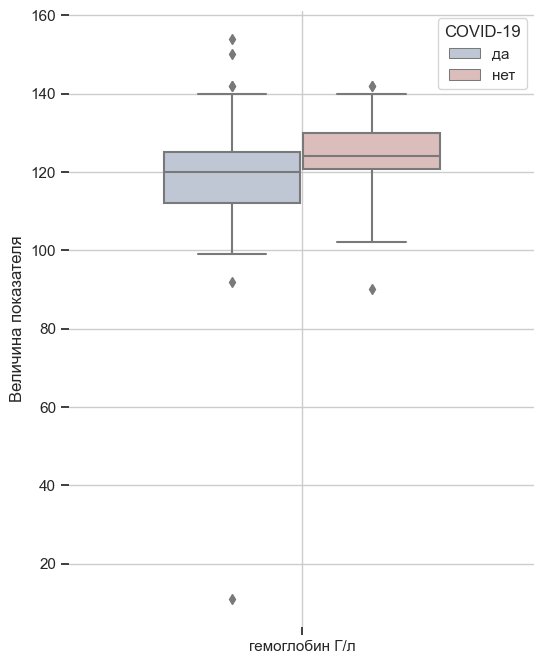

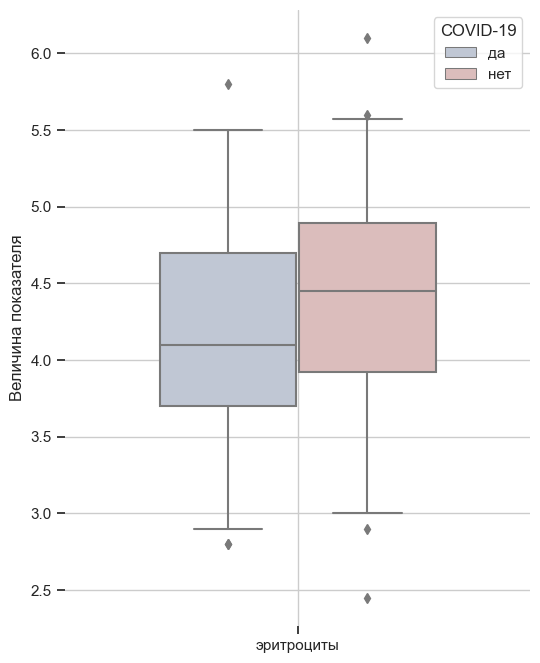

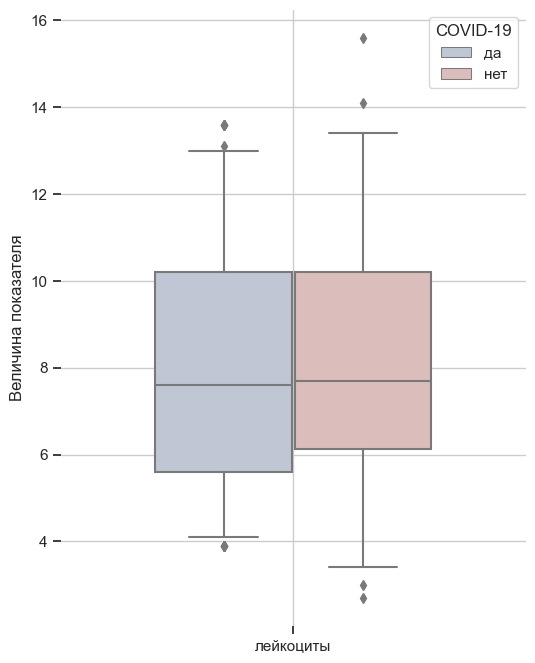

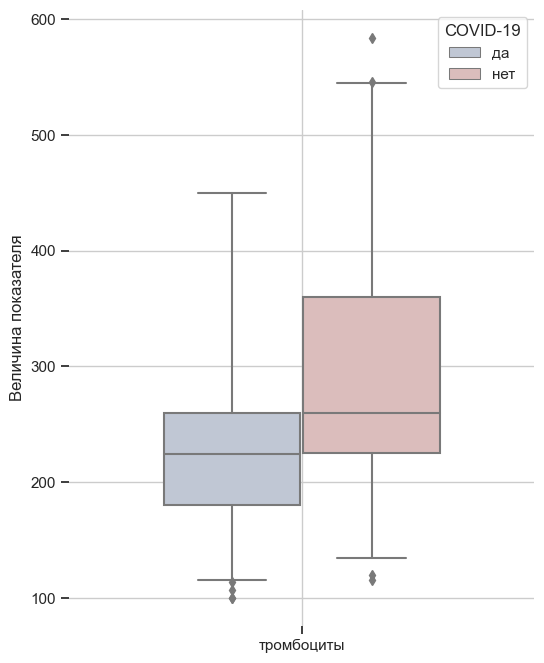

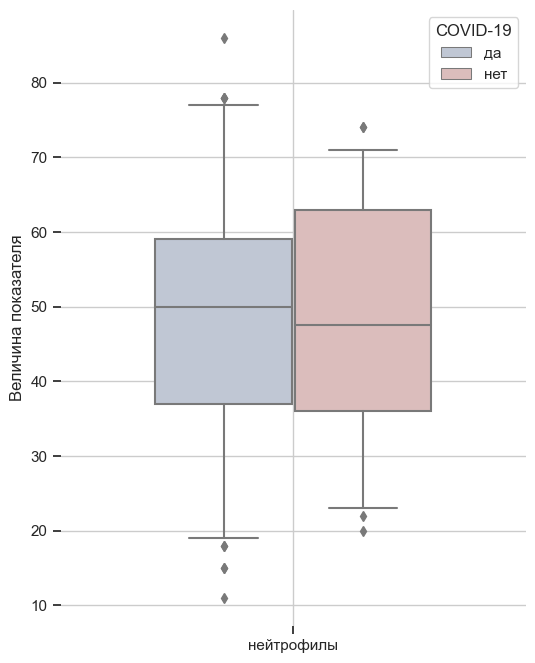

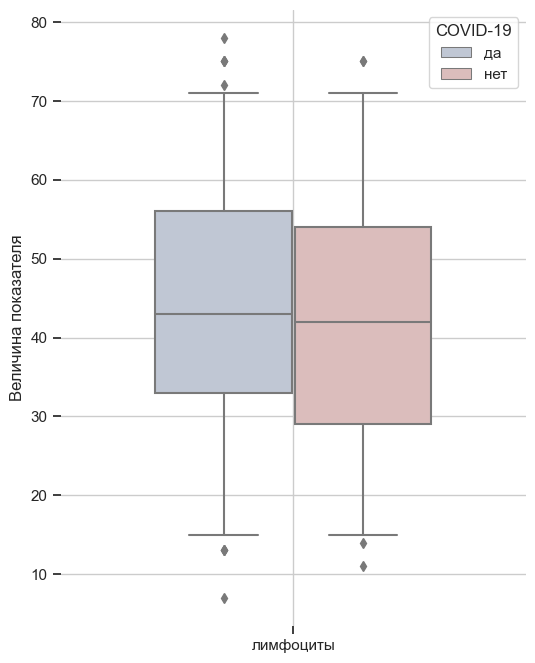

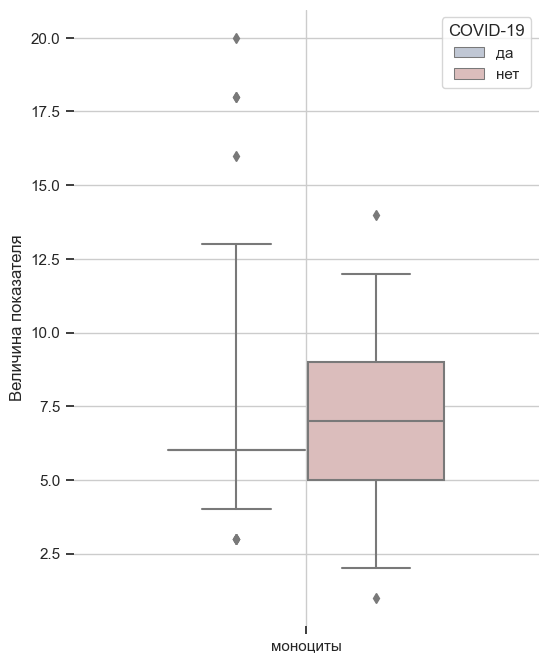

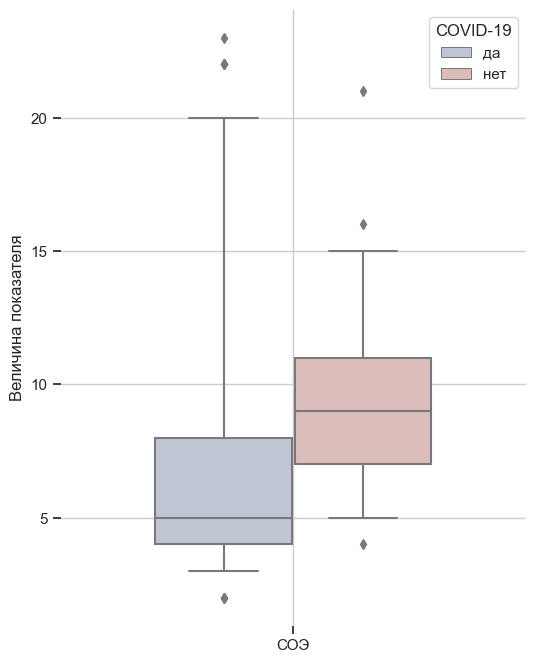

In [417]:
# verticalization of dataframe

vert_df = pd.DataFrame(columns=['Параметр', 'Величина', 'COVID-19'])
for p in cont_param:
    par_df = pd.Series([p for _ in range(len(df))], name='Параметр')  # for categorial scale
    val_df = df[p]  # for continuous scale
    val_df.name = 'Величина'
    three_df = pd.concat([par_df, val_df, df['COVID-19']], axis=1)  # merge 3 columns in block
    vert_df = pd.concat([vert_df, three_df], axis=0)  # merge blocks

# Boxplot
for p in cont_param:
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(6, 8))

    # Plot with vertical boxes
    sns.boxplot(data=vert_df[vert_df['Параметр'] == p], x='Параметр', y='Величина', hue='COVID-19', 
                
                orient='v', dodge=True, whis=[2.5, 97.5], width=.6, palette="vlag")

    # Add in points to show each observation
    # sns.stripplot(data=vert_df, x='Параметр', y='Величина', hue='COVID-19', orient='v', size=4, color=".3", linewidth=0)

    # Tweak the visual presentation
    plt.grid(True)
    plt.xticks(rotation=0)
    ax.set(ylabel="Величина показателя", xlabel="")
    sns.despine(trim=True, left=True)
    plt.savefig(p[:7] + '.png')

## Дополнительные количественные параметры, которые есть только для 40 человек

In [336]:
dop_cont_param = parametres[91:95]

descr_hlth = round(hlth[dop_cont_param[0]].describe(), 3)
descr_dis = round(dis[dop_cont_param[0]].describe(), 3)

for p in dop_cont_param[1:]:
    d_hlth, d_dis = round(hlth[p].describe(), 3), round(dis[p].describe(), 3)
    descr_hlth = pd.concat([descr_hlth, d_hlth], axis=1)
    descr_dis = pd.concat([descr_dis, d_dis], axis=1)

Неболевшие

In [335]:
descr_hlth

,железо сывороточное,вит Д3,IL-6,IL-10
count,20.000,20.000,20.000,20.000
mean,10.368,23.615,3.180,22.989
std,4.681,14.896,10.406,52.104
min,1.790,7.800,0.040,0.200
25%,7.098,12.000,0.330,0.325
50%,10.495,23.100,0.540,0.750
75%,14.052,26.650,0.805,7.655
max,17.620,72.200,47.120,167.980


Реконвалесценты

In [337]:
descr_dis

,железо сывороточное,вит Д3,IL-6,IL-10
count,20.000,20.000,20.000,20.000
mean,14.375,20.750,3.124,19.661
std,10.080,12.654,10.857,78.903
min,1.070,9.200,0.040,0.140
25%,6.725,12.875,0.175,0.280
50%,10.015,15.550,0.320,0.650
75%,22.145,22.375,1.000,1.865
max,34.460,64.200,48.940,354.380


In [316]:
dop_cont_result = pd.DataFrame(index=dop_cont_param, columns=['Тестовая статистика', 'p-value', 'Вид теста', 'Lilliefors p здор.', 'Lilliefors p бол.', 'p variances (Brown-Forsithe test)'])
nw_hlth, nw_dis = hlth, dis

# Fill the table
for p in dop_cont_param:
    
    # zeroing previous filters
    nw_hlth, nw_dis = hlth, dis
    
    # filter real values
    nw_hlth = hlth[hlth[p] > 0]
    nw_dis = dis[dis[p] > 0]
    
    # table filling
    dop_cont_result.loc[p] = t_test(nw_hlth[p], nw_dis[p], p)

In [351]:
# histogram and qq plot
for p in dop_cont_param:
    norm_plot(nw_hlth[p], nw_dis[p], p)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [317]:
dop_cont_result

,Тестовая статистика,p-value,Вид теста,Lilliefors p здор.,Lilliefors p бол.,p variances (Brown-Forsithe test)
железо сывороточное,-1.612333,0.119,2-сторонний t-тест Уэлча,0.468,0.051,0.016
вит Д3,227.5,0.465,Тест Манна-Уитни,0.021,0.017,0.549
IL-6,237.5,0.317,Тест Манна-Уитни,0.0,0.0,0.977
IL-10,224.0,0.524,Тест Манна-Уитни,0.0,0.0,0.877


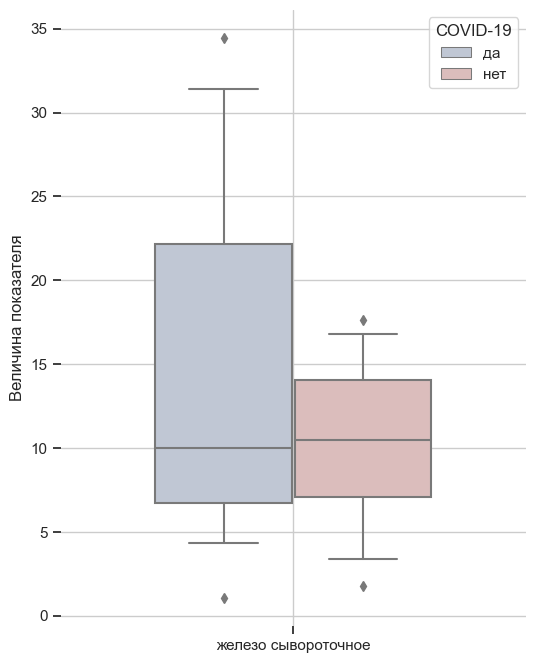

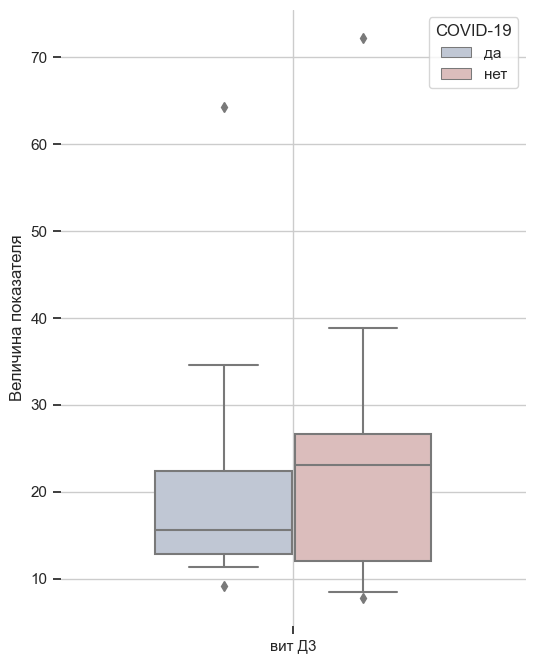

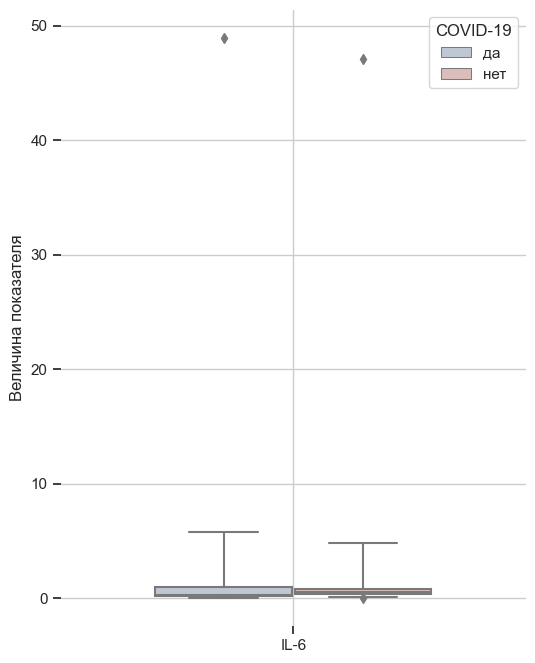

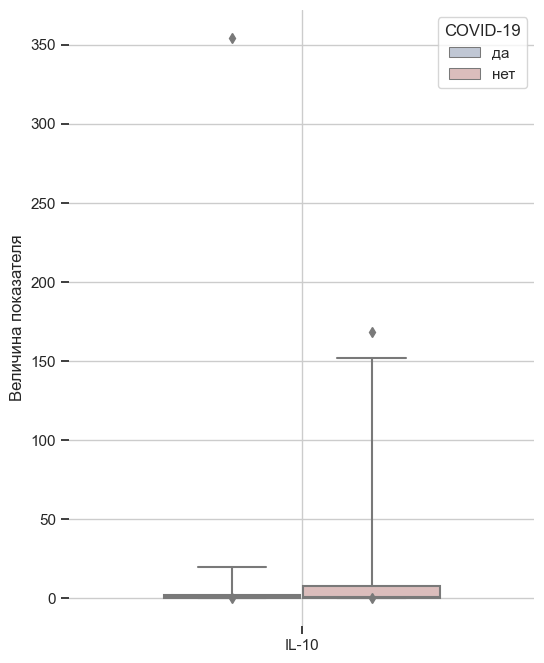

In [416]:
# verticalization of dataframe

vert_df = pd.DataFrame(columns=['Параметр', 'Величина', 'COVID-19'])
for p in dop_cont_param:
    par_df = pd.Series([p for _ in range(len(df))], name='Параметр')  # for categorial scale
    val_df = df[p]  # for continuous scale
    val_df.name = 'Величина'
    three_df = pd.concat([par_df, val_df, df['COVID-19']], axis=1)  # merge 3 columns in block
    vert_df = pd.concat([vert_df, three_df], axis=0)  # merge blocks

# Boxplot
for p in dop_cont_param:
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(6, 8))

    # Plot with vertical boxes
    sns.boxplot(data=vert_df[vert_df['Параметр'] == p], x='Параметр', y='Величина', hue='COVID-19', 
                
                orient='v', dodge=True, whis=[2.5, 97.5], width=.6, palette="vlag")

    # Add in points to show each observation
    # sns.stripplot(data=vert_df, x='Параметр', y='Величина', hue='COVID-19', orient='v', size=4, color=".3", linewidth=0)

    # Tweak the visual presentation
    plt.grid(True)
    plt.xticks(rotation=0)
    ax.set(ylabel="Величина показателя", xlabel="")
    sns.despine(trim=True, left=True)
    plt.savefig(p[:7] + '.png')